# Epsilon Greedy

In [148]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
def ind_max(x):
    m = max(x)
    return x.index(m)

In [74]:
def test_algorithm(algo, arms, num_sims, horizon):
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0.0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims * horizon)]
    times = [0.0 for i in range(num_sims * horizon)]
    
    for sim in range(num_sims):
        sim = sim + 1
        algo.initialize(len(arms))
        
        for t in range(horizon):
            t = t + 1
            index = (sim - 1) * horizon + t - 1
            sim_nums[index] = sim
            times[index] = t
            
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            reward = arms[chosen_arms[index]].draw()
            rewards[index] = reward
            
            if t == 1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index - 1] + reward
                
            algo.update(chosen_arm, reward)
    
    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]

In [75]:
class EpsilonGreedy():
    def __init__(self,epsilon,counts,values):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
        return
    
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return
    
    def select_arm(self):
        if random.random() > self.epsilon:
            return ind_max(self.values)
        else:
            return random.randrange(len(self.values))
        
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n) * value + 1 / float(n) * reward)
        self.values[chosen_arm] = new_value
        return

In [76]:
class BernoulliArm():
    def __init__(self, p):
        self.p = p
    
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

In [178]:
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
print("Best arm is " + str(ind_max(means)))

Best arm is 3


In [194]:
f = open("./epsilon_greedy_results.tsv","w")

for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5]:
    algo = EpsilonGreedy(epsilon, [], [])
    algo.initialize(n_arms)
    results = test_algorithm(algo, arms, 1000, 500)
    for i in range(len(results[0])):
        f.write(str(epsilon) + "\t")
        f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")

f.close()

In [195]:
results = pd.read_csv("./epsilon_greedy_results.tsv", sep = "\t", names=["Epsilon", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])

<AxesSubplot:xlabel='T'>

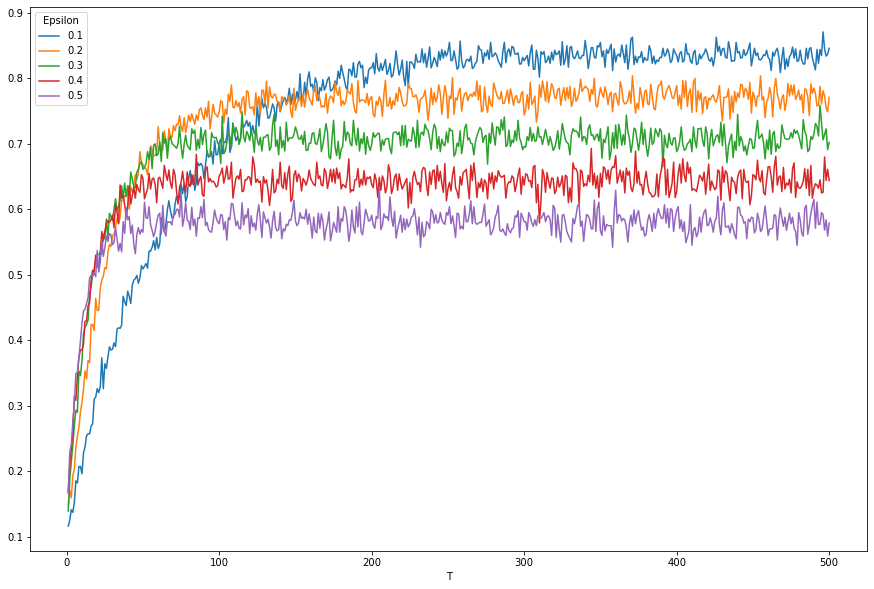

In [197]:
grouped_results = results[["Epsilon","T","Reward"]].groupby(["Epsilon","T"]).mean("Reward").reset_index()
grouped_results = grouped_results.pivot(index = "T", columns = "Epsilon", values = "Reward")
grouped_results.plot(figsize=(15, 10))